# Linear Regression

Add cells for your answers as needed after each question.

1. Create a sample dataset $\{ (x^{(i)},y^{(i)}) \}$  of 1000 examples where 
    * $x$ and $y$ are approximately linearly dependent. You may pick the parameters $w,b$ as you like.
    * $y - (w x+b)$ is normal distributed. 
    
Plot $x$ vs $y$ and histogram $y - (w x+b)$.
   

### Professor's Hint 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# y = wx + b
def generate_dataset(N = 1000 , w = 1., b = 0.,std = 0.25, x_min = 0. , x_max = 1.0):
    x = (x_max-x_min)*np.random.random(N) + x_min
    #normally distribute
    return x,np.random.normal(0.,std,N) + (w*x+b) 

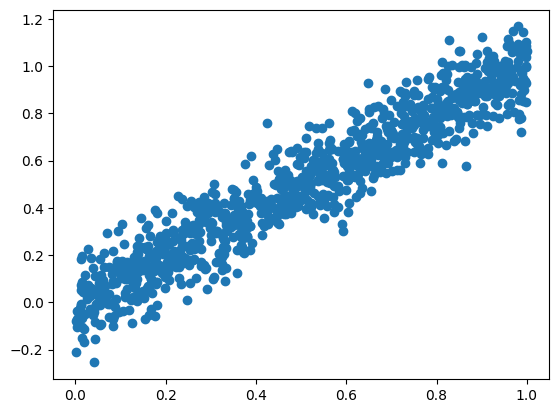

In [2]:
plt.scatter(*generate_dataset(std=0.1))

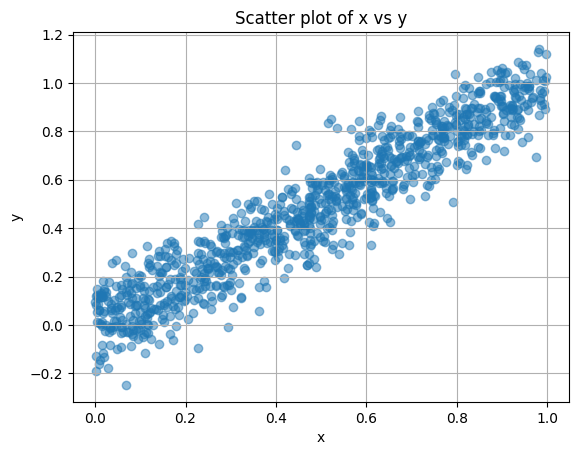

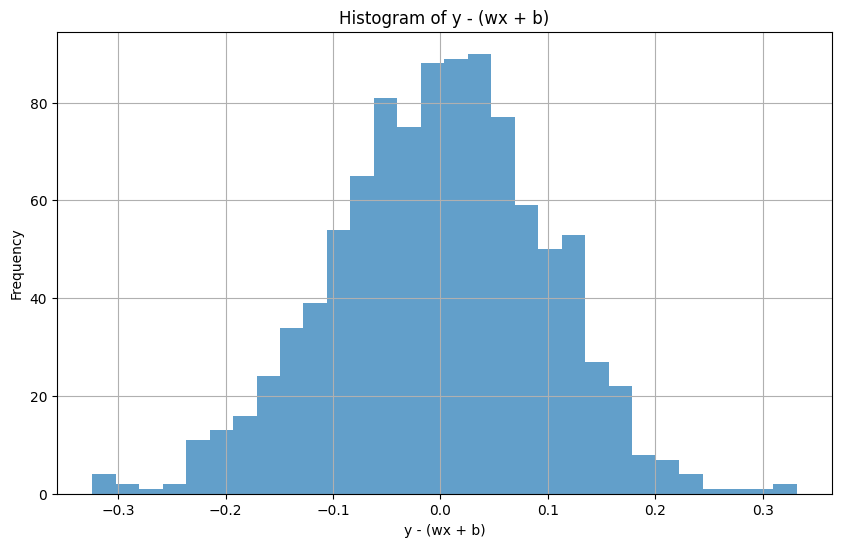

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# y = wx + b
def generate_dataset(N=1000, w=1.0, b=0.0, std=0.25, x_min=0.0, x_max=1.0):
    x = (x_max - x_min) * np.random.random(N) + x_min
    y = np.random.normal(0.0, std, N) + (w * x + b)
    return x, y

# Generate dataset with global variables to make the plotting easier 

w = 1
b = 0
x,y = generate_dataset(std=0.1)

#  x vs y

plt.scatter(x, y, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x vs y')
plt.grid(True)
plt.show()

# y - (wx + b)
y_diff = y - (w * x + b)
plt.figure(figsize=(10, 6))
plt.hist(y_diff, bins=30, alpha=0.7)
plt.xlabel('y - (wx + b)')
plt.ylabel('Frequency')
plt.title('Histogram of y - (wx + b)')
plt.grid(True)
plt.show()

2. Create functions `model_loop(x,w,b)` and `model_np(x,w,b)` that compute $y=wx+b$, the first using explicit loops, the second computing using numpy and no loops. Illustrate that the two functions create identical output. Use numpy version for the remainder of the lab.

In [6]:
def model_loop(x,w,b):
    y = []
    for i in range(len(x)):
        y.append(w*x[i]+b)
    return y

def model_np(x,w,b):
    return w * np.array(x) + b

In [7]:
# test outputs
x = [2,4,6,8,10]
w = 1
b = 1

test_loop = model_loop(x,w,b)

test_np = model_np(x,w,b)


In [13]:
test_loop

[3, 5, 7, 9, 11]

In [14]:
test_np

array([ 3,  5,  7,  9, 11])

3. Plot $x$ vs $y$ and compare to $x$ vs. $wx+b$ for the parameters from exercise 1.

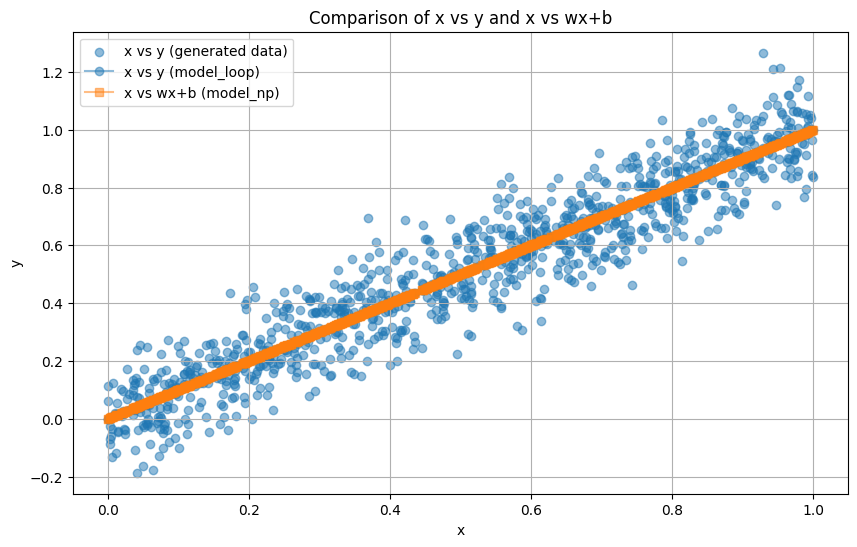

In [16]:
# y = wx + b
def generate_dataset(N=1000, w=1.0, b=0.0, std=0.25, x_min=0.0, x_max=1.0):
    x = (x_max - x_min) * np.random.random(N) + x_min
    y = np.random.normal(0.0, std, N) + (w * x + b)
    return x, y

# Model functions
def model_loop(x, w, b):
    y = []
    for i in range(len(x)):
        y.append(w * x[i] + b)
    return y

def model_np(x, w, b):
    return w * np.array(x) + b

# Generate dataset
w, b = 1, 0
x, y = generate_dataset(w=w, b=b, std=0.1)

# Compute model predictions
test_loop = model_loop(x, w, b)
test_np = model_np(x, w, b)

# 'x vs y' vs 'x vs wx + b'
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='x vs y (generated data)', alpha=0.5)
plt.plot(x, test_loop, 'o-', label='x vs y (model_loop)', alpha=0.5)
plt.plot(x, test_np, 's-', label='x vs wx+b (model_np)', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of x vs y and x vs wx+b')
plt.legend()
plt.grid(True)
plt.show()

4. Create a function `cost(x,y,w,b)` that computes the mean square error between model prediction and data. Use numpy expressions and do not do any explicit loops in python. Make 2 plots illusrating the parabolic shape of the cost function:
   * Plot the cost vs $w$ for the dataset, holding $b$ constant. 
   * Plot the cost vs $b$ for the dataset, holding $w$ constant. 


In [34]:
def cost(x,y,w,b):
    y_prediction = w * x + b
    return np.mean(y-y_pred ** 2) 


w = 2
b = 1
x,y = generate_dataset(w=w,b=b,std=0.1)



# cost vs w
#need a range of w values to evaluate
w_values = np.linspace(0,4,100)
cost_values_w = [cost(x, y, w, b_true) for w in w_values]

5. Create a function `dj_dw, dj_db = gradient(x, y, w, b)` that computes the gradient wrt $w$ and $b$ on a dataset. Use numpy expressions and do not do any explicit loops in python. Make 2 plots that illustrates that the gradient is 0 at the optimal values of $w$ and $b$ by:
   * Ploting the gradient vs $w$ for the dataset, holding $b$ constant. 
   * Ploting the gradient vs $b$ for the dataset, holding $w$ constant. 

6. Use the following `gradient_descent` function to "fit" a line to the data.  Make sure you do not start at the optimal values from exercise 1. You may have to try different values of `alpha`. 

In [1]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient): 
    w = copy.deepcopy(w_in) 
    
    J_history = []
    p_history = []

    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient(x, y, w , b)     

        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        if i<100000:    
            J_history.append( cost(x, y, w , b))
            p_history.append([w,b])
            
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history 

7. Plot the cost and parameters versus iteration of gradient descent.